## Machine Learning Online Class - Exercise 1: Linear Regression

Instructions

------------

  This file contains code that helps you get started on the
  linear exercise. You will need to complete the following functions
  in this exericse:

     warmUpExercise.m
     plotData.m
     gradientDescent.m
     computeCost.m
     gradientDescentMulti.m
     computeCostMulti.m
     featureNormalize.m
     normalEqn.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.

 x refers to the population size in 10,000s
 y refers to the profit in $10,000s

In [1]:
# Initialization
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../')
from ex1.computeCost import computeCost
from ex1.gradientDescent import gradientDescent
from ex1.plotData import plotData
from ex1.warmUpExercise import warmUpExercise

In [2]:
# ==================== Part 1: Basic Function ====================

print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')
warmUpExercise()

Running warmUpExercise ... 
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Plotting Data ...


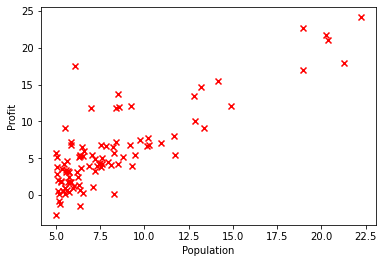

In [3]:
# ======================= Part 2: Plotting =======================
print('Plotting Data ...')

path = 'ex1data1.txt'
data = pd.read_csv('ex1data1.txt', header=None)  # 无header
X = data.iloc[:, 0]
y = data.iloc[:, 1]
m = len(y)

# Plot Data
# Note: You have to complete the code in plotData.m
plotData(X, y)

In [4]:
# =================== Part 3: Cost and Gradient descent ===================
X = np.array(X).reshape(m, 1)
X = np.insert(X, 0, np.ones(m), axis=1)  # Add a column of ones to x
y = np.array(y).reshape(m, 1)
theta = np.zeros((2, 1))  # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0  0]\nCost computed = %.2f' % J)
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.array([[-1, 2]]))
print('\nWith theta = [-1  2]\nCost computed = %.2f' % J)
print('Expected cost value (approx) 54.24')


Testing the cost function ...

With theta = [0  0]
Cost computed = 32.07
Expected cost value (approx) 32.07

With theta = [-1  2]
Cost computed = 54.24
Expected cost value (approx) 54.24



Running Gradient Descent ...

Theta found by gradient descent:
[-3.6303, 1.1664]
Expected theta values (approx)

[-3.6303  1.1664]
For population = 35,000, we predict a profit of 4519.77
For population = 70,000, we predict a profit of 45342.45



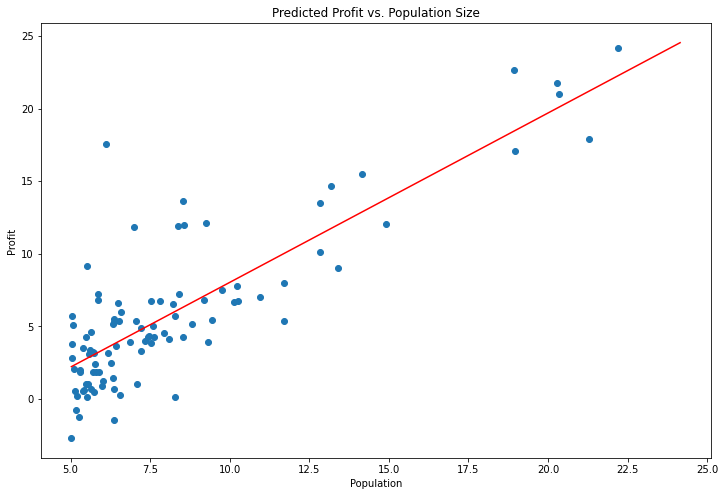

In [5]:
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta, J = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:')
print('[{:.4f}, {:.4f}]'.format(theta[0, 0], theta[0, 1]))
print('Expected theta values (approx)\n')
print('[-3.6303  1.1664]')

# Plot the linear fit
x = np.linspace(data.iloc[:, 0].min(), data.iloc[:, 1].max(), 100)  # 获取自变量点集
f = theta[0, 0] + theta[0, 1] * x
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Linear regression')  # 绘制回归直线
ax.scatter(X[:, 1], y, label='Traning Data')  # 散点图数据读入并绘制

ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([[1, 3.5]]) @ theta.T
print('For population = 35,000, we predict a profit of %.2f' % (predict1 * 10000))
predict2 = np.array([[1, 7]]) @ theta.T
print('For population = 70,000, we predict a profit of %.2f\n' % (predict2 * 10000))

Visualizing J(theta_0, theta_1) ...


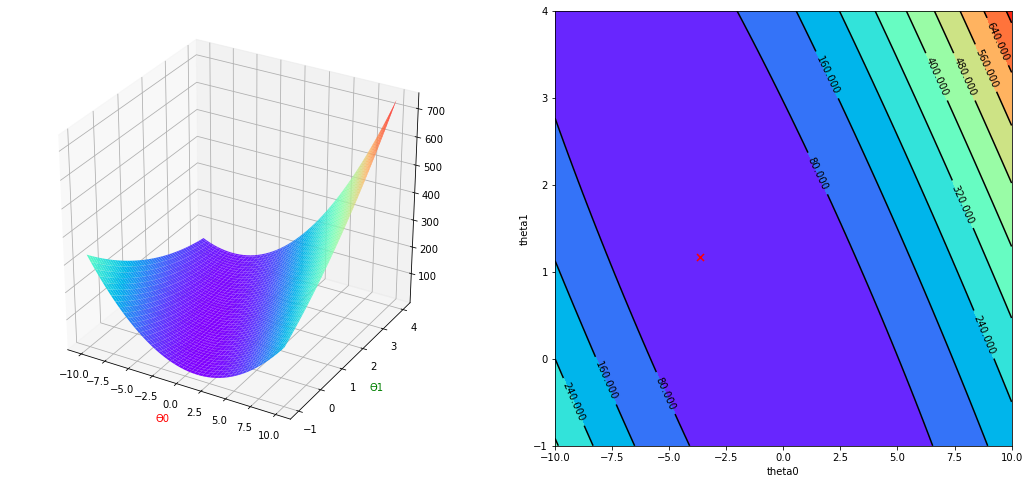

In [6]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(0, theta0_vals.shape[0]):
    for j in range(0, theta1_vals.shape[0]):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped

fig = plt.figure(figsize=(18, 8))

# Surface plot 图1
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='rainbow')
ax.set_xlabel('Ɵ0', color='r')
ax.set_ylabel('Ɵ1', color='g')
ax.set_zlabel('J', color='1')  # 给三个坐标轴注明

# Contour plot 图2

ax = fig.add_subplot(1, 2, 2)
ax.contourf(theta0_vals, theta1_vals, J_vals, 10, cmap='rainbow')
# 使用contour绘制等高线
C = ax.contour(theta0_vals, theta1_vals, J_vals, 10, colors='black')  # 绘制10条黑色等高线
# 在等高线处添加数字
ax.clabel(C, inline=True, fontsize=10)
ax.scatter(theta[0, 0], theta[0, 1], color='r', s=50, marker="x")  # 绘制标记点
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')

# 显示图片
plt.show()